In [1]:
import mpf_py  # Assuming mpf_py.MPF is available
from utils import gen_data, plot_2d_model_predictions, true_model3  # Adjust import according to your project structure
import numpy as np

x_train, y_train = gen_data(n=5000, seed=3, model=true_model3)
x_test, y_test = gen_data(n=5000, seed=4, model=true_model3)


In [2]:

# Fit the best MPF model with identified=True
best_params = {'epochs': 3,
 'n_iter': 28,
 'split_try': 16,
 'n_trees': 40,
 'colsample_bytree': 1.0,
 'identification': 'l2_arith_mean'}
model_arith_mean, _ = mpf_py.MPF.fit_boosted(
    x_train, y_train,
    **best_params
)

best_params['identification'] = 'l2_median'
model_median, _ = mpf_py.MPF.fit_boosted(
    x_train, y_train,
    **best_params
)


err: 0.5192517490585062
err: 0.5178813433815679
err: 0.5204372565486256
err: 0.5174196000608403
err: 0.5179297452199568
err: 0.5152006060047929
err: 0.5177747024790883
err: 0.5178251487227311
err: 0.520498412018867
err: 0.521547203836999
err: 0.5183404802174687
err: 0.5163448021814032
err: 0.5196530493470249
err: 0.5172282837976571
err: 0.5201416786041553
err: 0.516512252455523
err: 0.5182260791505401
err: 0.5200157059288119
err: 0.5182991025439339
err: 0.5163901205070709
err: 0.5208963543240046
err: 0.518698344159434
err: 0.5216622014109431
err: 0.5179066628086212
err: 0.5169158692547966
err: 0.5197991237554997
err: 0.5197124661690401
err: 0.5168522076495272
err: 0.51759534486704
err: 0.5147211594275073
err: 0.5190430741450202
err: 0.5175458699895036
err: 0.5161719434888299
err: 0.5173019469397641
err: 0.5169618758041498
err: 0.5190743147464346
err: 0.519362210749771
err: 0.5147363948987481
err: 0.5177578368109449
err: 0.5184161789099325
Combining tree grids into a single tree grid.
e

In [3]:
# Make predictions
predictions_arith_mean = model_arith_mean.predict(x_test)
test_error_arith_mean = np.mean((y_test - predictions_arith_mean) ** 2)
print(f"Test MSE: {test_error_arith_mean}")

predictions_median = model_median.predict(x_test)
test_error_median = np.mean((y_test - predictions_median) ** 2)
print(f"Test MSE: {test_error_median}")


Test MSE: 0.2676078793088924
Test MSE: 0.2728192064918406


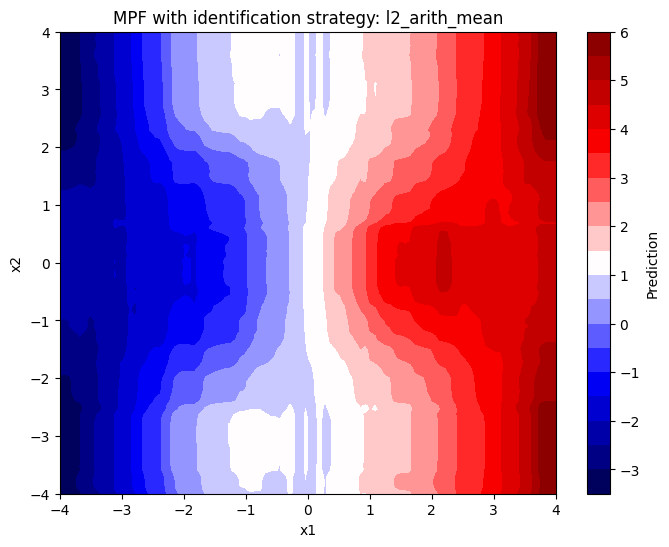

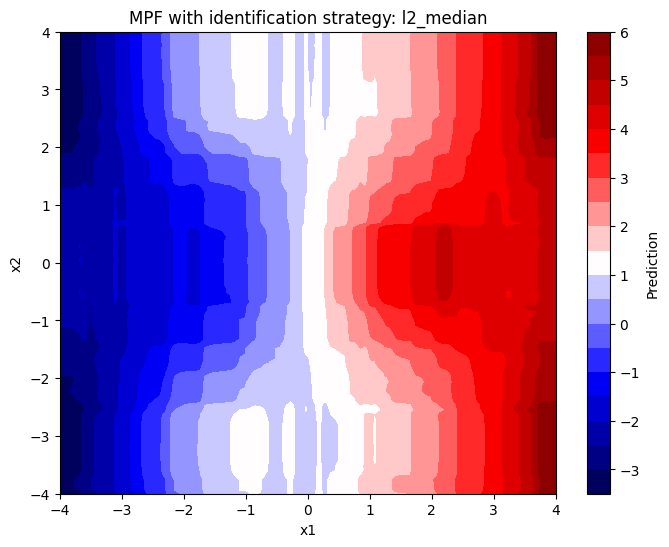

In [4]:

plot_2d_model_predictions(lambda x: model_arith_mean.predict(x), title="MPF with identification strategy: l2_arith_mean")
plot_2d_model_predictions(lambda x: model_median.predict(x), title="MPF with identification strategy: l2_median")


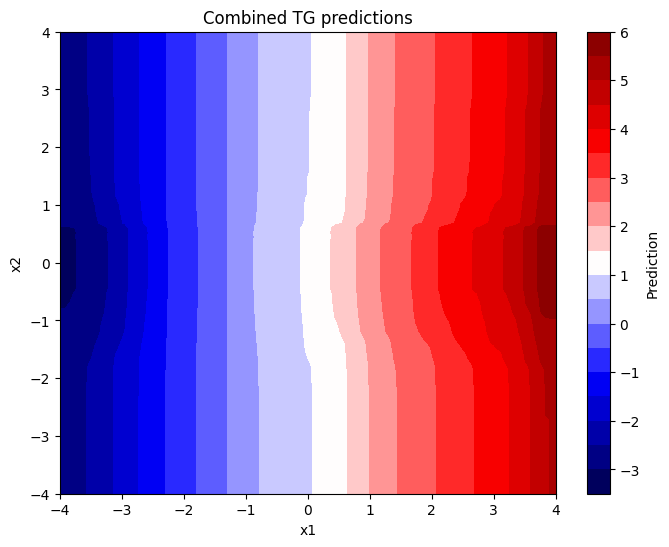

/Users/sqf320/Documents/rust-projects/rpf-rust/mpf-py/python/mpf_py/mpf.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


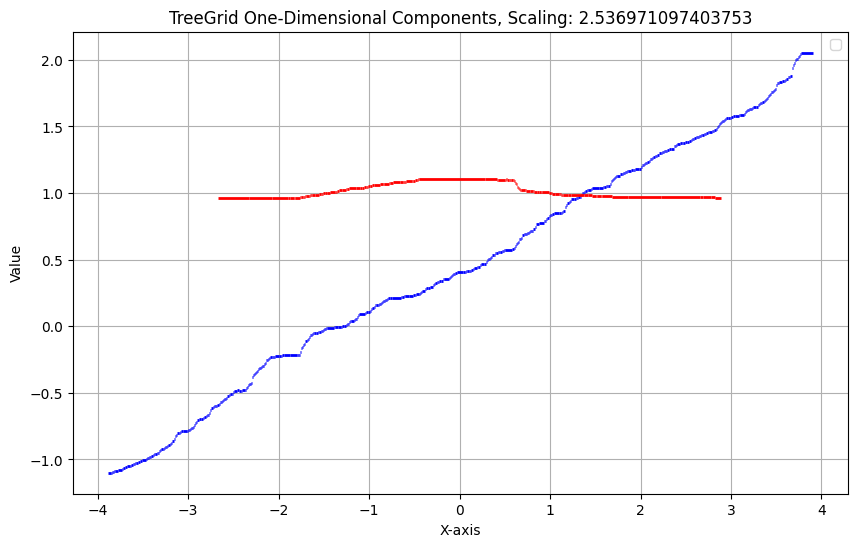

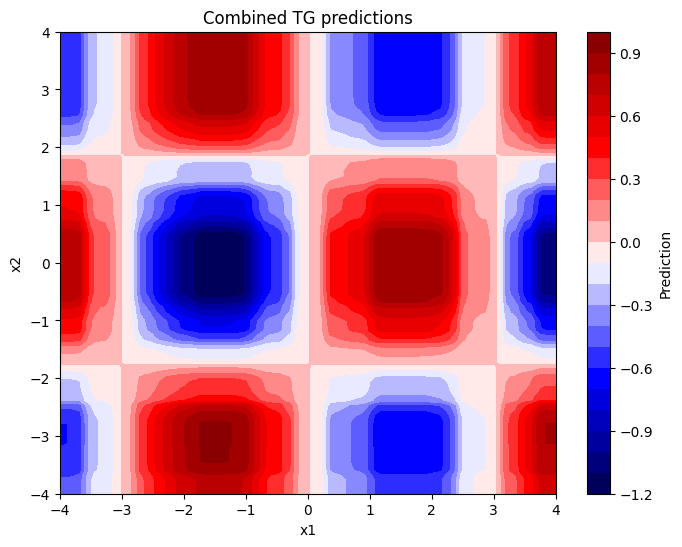

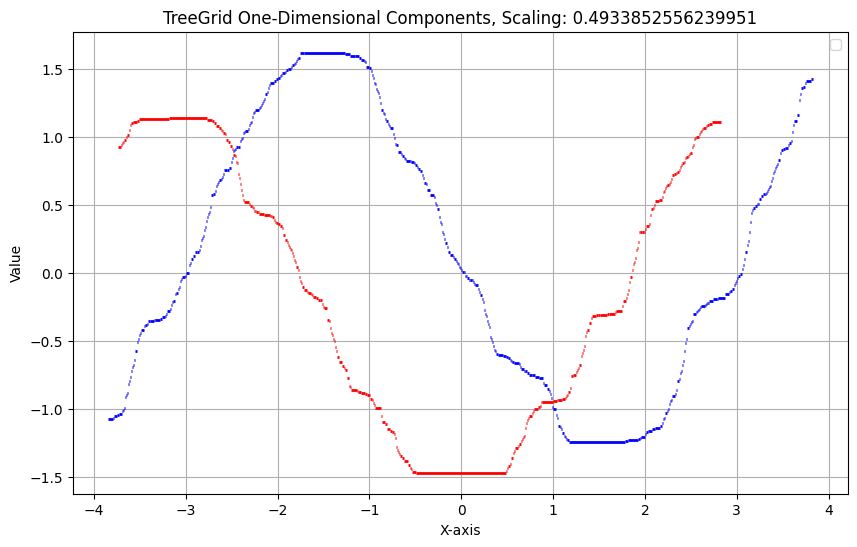

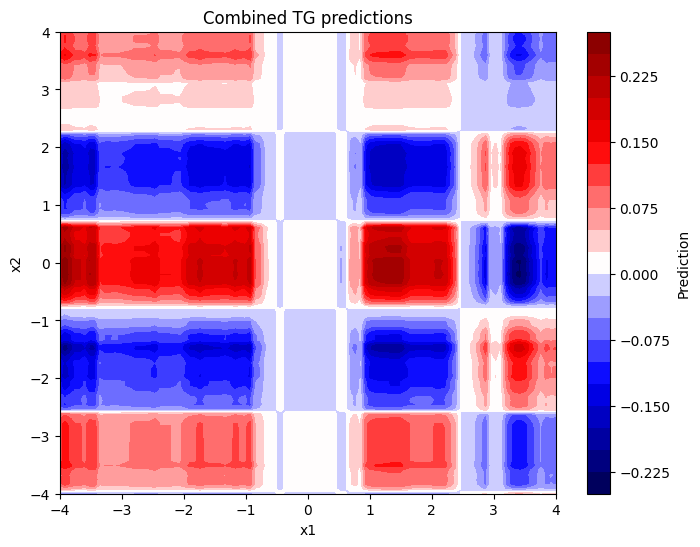

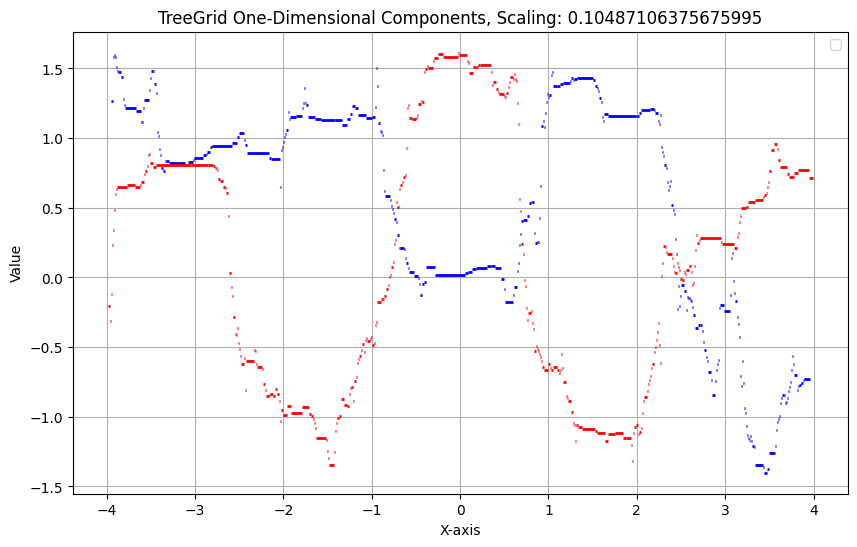

In [5]:
for tgf in model_arith_mean.tree_grid_families:
    combined_tg = mpf_py.TreeGrid(tgf.combined_tree_grid)
    plot_2d_model_predictions(lambda x: combined_tg.predict(x), title="Combined TG predictions")
    combined_tg.plot_components()


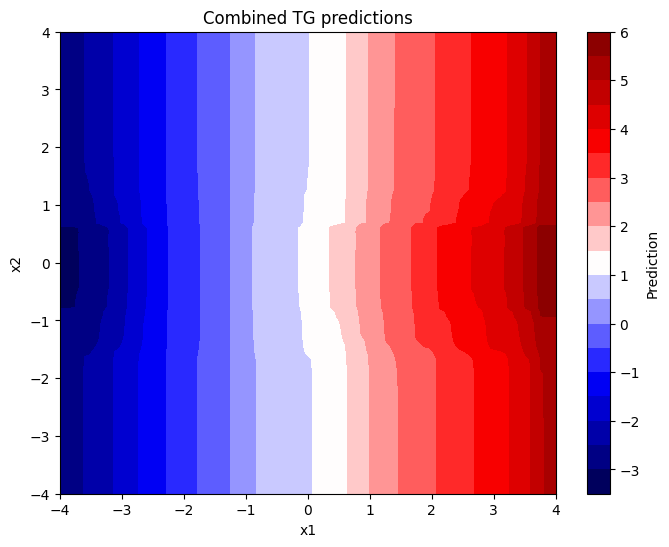

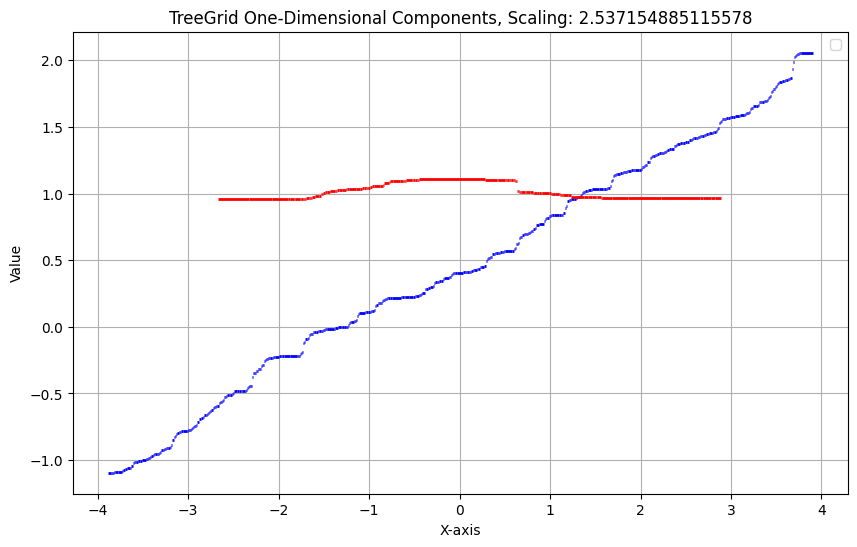

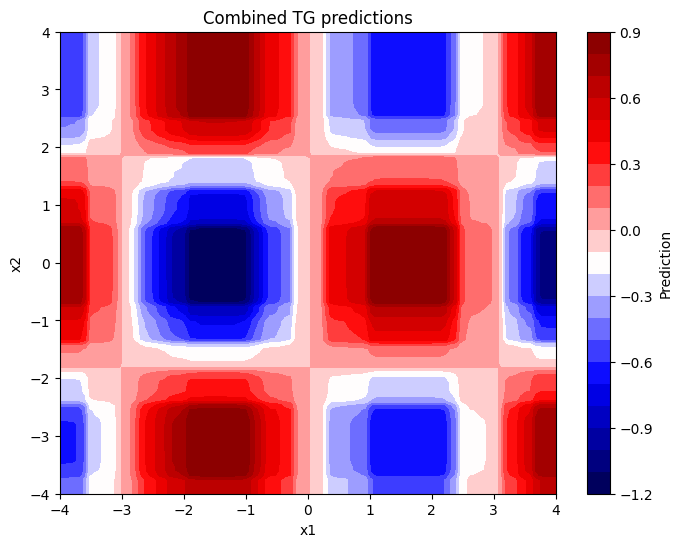

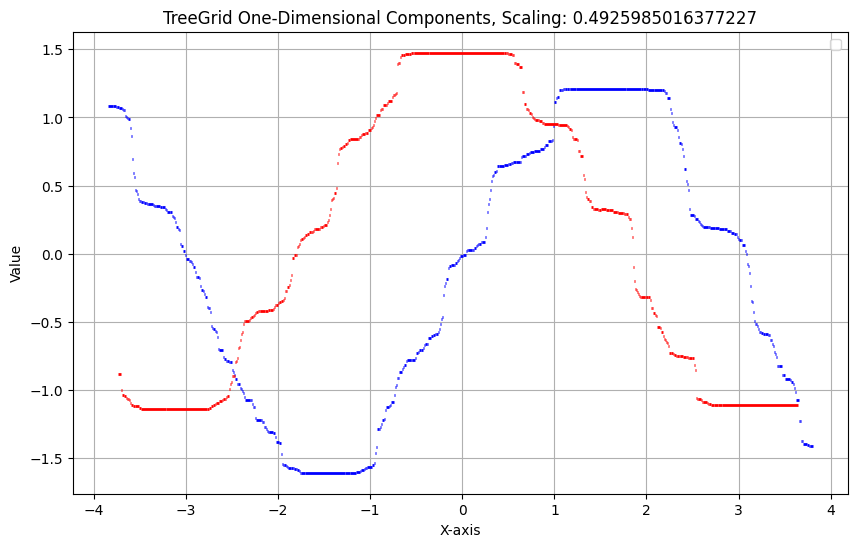

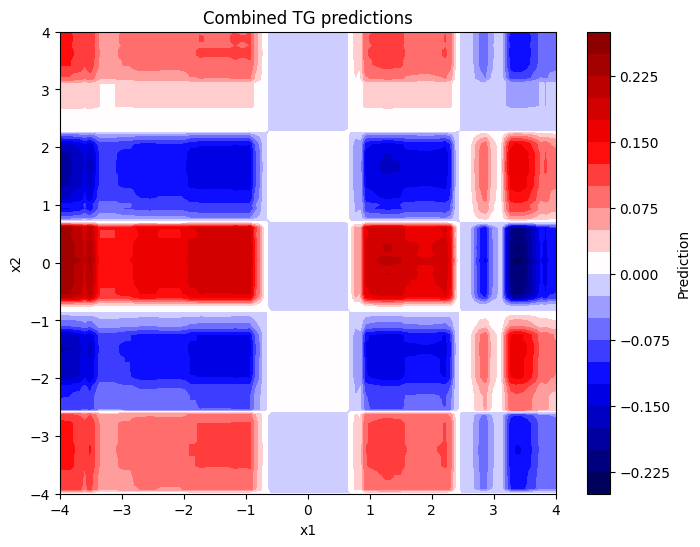

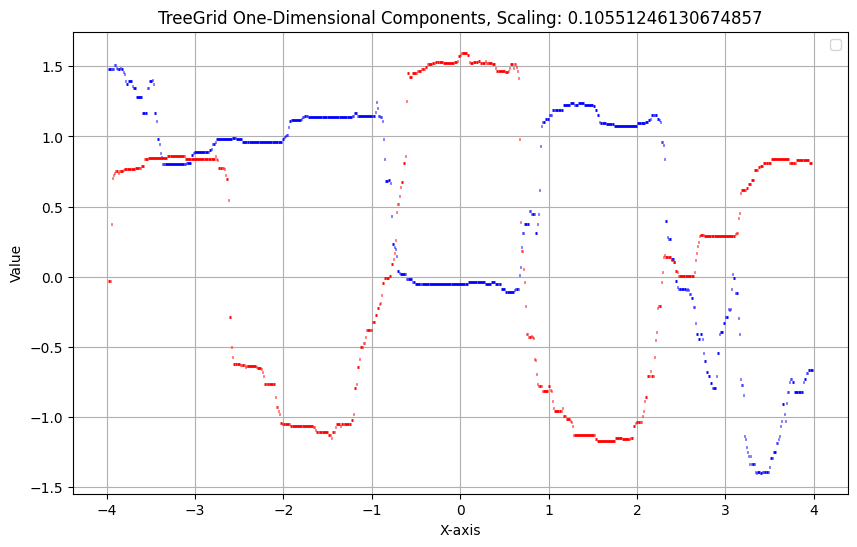

In [6]:
for tgf in model_median.tree_grid_families:
    combined_tg = mpf_py.TreeGrid(tgf.combined_tree_grid)
    plot_2d_model_predictions(lambda x: combined_tg.predict(x), title="Combined TG predictions")
    combined_tg.plot_components()
